<a href="https://colab.research.google.com/github/aleshweta/DataAnalytics/blob/main/S_Ale_Module7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anaylsis of features

A dataframe containing :

dir:debt payments to total income ratio

hir:housing expenses to income ratio

lvr:ratio of size of loan to assessed value of property

ccs:consumer credit score from 1 to 6 (a low value being a good score)

mcs:mortgage credit score from 1 to 4 (a low value being a good score)

pbcr:public bad credit record ?

dmi:denied mortgage insurance ?

self:self employed ?

single:is the applicant single ?

uria:1989 Massachusetts unemployment rate in the applicant's industry

condominium:is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)

black:is the applicant black ?

deny:mortgage application denied ?

## Data Summary and EDA

In [51]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/aleshweta/DataAnalytics/main/HDMA%20Boston%20Housing%20.csv")
del df[df.columns[0]] #delete first column containing index
df.columns=['dir','hir','lvr','ccs','mcs','pbcr','dmi','self','single','uria','condominium','black','deny']


df_original = df #copy
print(df.shape)
df.head()

(2381, 13)


,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no



##Check missing values

In [ ]:

df.isna().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
condominium    0
black          0
deny           0
dtype: int64

We have missing values for 1 public bad record and 1 self employed. So, its just 1 and we can just drop the columns

In [ ]:
#dropping columns pbcr and self
df_new = df.drop(['pbcr','self','uria'], inplace=True, axis=1)


print(df)

           dir       hir       lvr       ccs       mcs dmi single  \
0     0.221000  0.221000  0.800000  5.000000  2.000000  no     no   
1     0.265000  0.265000  0.921875  2.000000  2.000000  no    yes   
2     0.372000  0.248000  0.920398  1.000000  2.000000  no     no   
3     0.320000  0.250000  0.860465  1.000000  2.000000  no     no   
4     0.360000  0.350000  0.600000  1.000000  1.000000  no     no   
...        ...       ...       ...       ...       ...  ..    ...   
2376  0.300000  0.300000  0.777049  1.000000  2.000000  no    yes   
2377  0.260000  0.200000  0.526761  2.000000  1.000000  no     no   
2378  0.320000  0.260000  0.753846  6.000000  1.000000  no    yes   
2379  0.350000  0.260000  0.813559  2.000000  2.000000  no    yes   
2380  0.330814  0.255346  0.700783  2.116387  1.721008  no    yes   

      condominium black deny  
0               0    no   no  
1               0    no   no  
2               0    no   no  
3               0    no   no  
4               

We don't need 1989 Massachusetts unemployment rate in the applicant's industry so we drop the uria column

In [ ]:
df.nunique()

dir             520
hir             501
lvr            1538
ccs               7
mcs               5
dmi               2
single            2
condominium       2
black             2
deny              2
dtype: int64

We have high unique values for dir,hir,uria  and lvr but its possible because we have high range for them but for ccs is suspcious as we have total range of 1-6 only and also for mcs which rang is 1-4 so, we have to explore these two.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   dmi          2381 non-null   object 
 6   single       2381 non-null   object 
 7   condominium  2381 non-null   int64  
 8   black        2381 non-null   object 
 9   deny         2381 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 186.1+ KB


type of our data seems in correct form.

In [ ]:
#check for nulls
df.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
dmi            0
single         0
condominium    0
black          0
deny           0
dtype: int64

We don't have any nulls.

In [ ]:
df.describe()

,dir,hir,lvr,ccs,mcs,condominium
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000


##Categorical data


In [ ]:
#check each categorical value
vals = df[['dmi','single','black','deny']].copy()
for x in range(len(vals.columns)):
    print(vals.columns[x] + ":")
    print(vals[vals.columns[x]].unique())
    print("")

dmi:
['no' 'yes']

single:
['no' 'yes']

black:
['no' 'yes']

deny:
['no' 'yes']



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


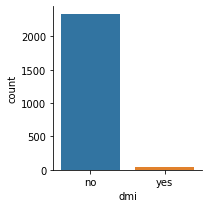

In [53]:
import seaborn as sns
#doing same charts as above using seaborn
sns.factorplot(x='dmi', data=df , kind='count',size = 3, aspect=1 )

##Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb702a5fc90>,
      dtype=object)

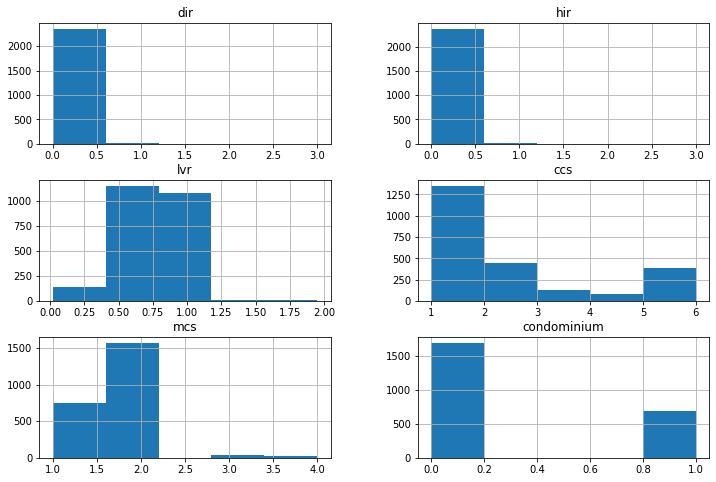

In [44]:
import matplotlib as plt
df_numerical = df.drop(['dmi','single','black','deny'], axis=1)
df_numerical.hist(bins=5, figsize = (12,8))


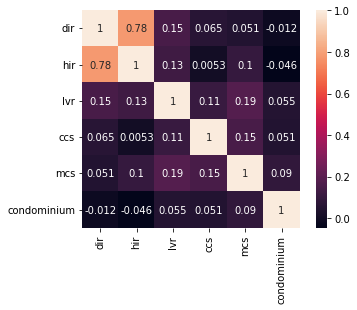

In [49]:
# Correlation Map of our NON-CATEGORICAL DATA
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)


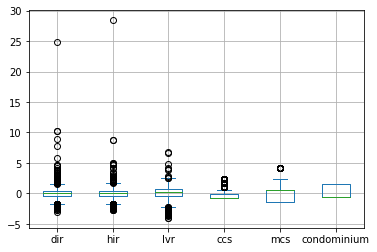

In [55]:
numericDataColumns = ['dir','hir','lvr','ccs','mcs','condominium']
vals = df[numericDataColumns].copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
vals_scaled = scaler.fit_transform(vals)
vals_scaled = pd.DataFrame(vals_scaled, columns=numericDataColumns)

vals_scaled.plot.box(grid='True')

We see outliers in dir and hir dataset but it is possible to see such difference and it okay to keep it.

##Regression

In [ ]:
#scaling
from sklearn import preprocessing
import numpy as np
a = df.drop(['dmi','single','black','deny'], axis=1)
df_SI = np.array(a.values.tolist())
min_max_scaler = preprocessing.MinMaxScaler()
#print(df_SI)
x_scaled = min_max_scaler.fit_transform(df_SI)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = ['dir','hir','lvr','ccs','mcs','condominium']
df_scaled.tail()

,dir,hir,lvr,ccs,mcs,condominium
2376,0.100000,0.100000,0.392253,0.000000,0.333333,1.0
2377,0.086667,0.066667,0.262570,0.200000,0.000000,0.0
2378,0.106667,0.086667,0.380231,1.000000,0.000000,1.0
2379,0.116667,0.086667,0.411171,0.200000,0.333333,1.0
2380,0.110271,0.085115,0.352737,0.223277,0.240336,0.0


In [ ]:
import statsmodels.api as sm
y = df_scaled['lvr'].copy()
x = df_scaled.drop(['lvr'], axis = 1)

model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    lvr   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              4019.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):                        0.00
Time:                        02:21:20   Log-Likelihood:                          1579.9
No. Observations:                2381   AIC:                                     -3150.
Df Residuals:                    2376   BIC:                                     -3121.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------